In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [ ]:
# Load the data
data = pd.read_csv('/content/ds_salaries.csv')  # Replace with actual file path

# Display the first few rows
print(data.head())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())


   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  

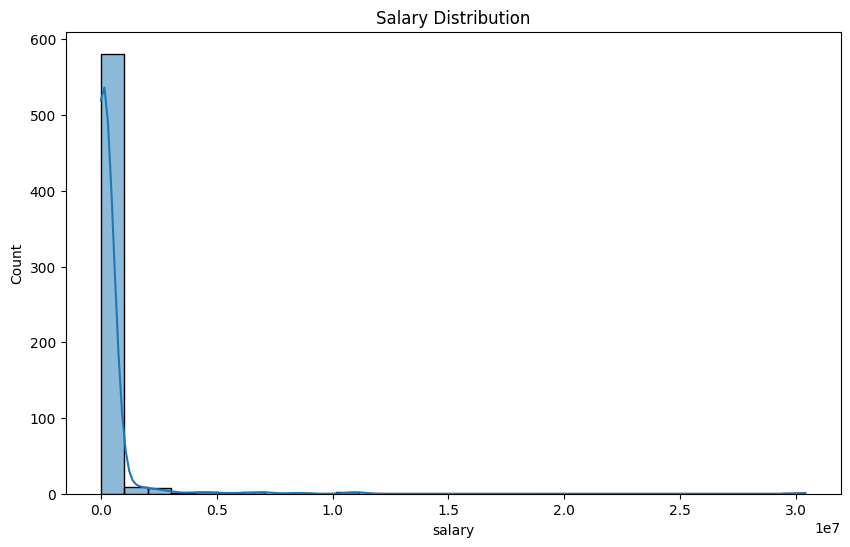

<ipython-input-4-d676820e476d>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='salary', y='job_title', data=data, estimator=np.mean, ci=None)


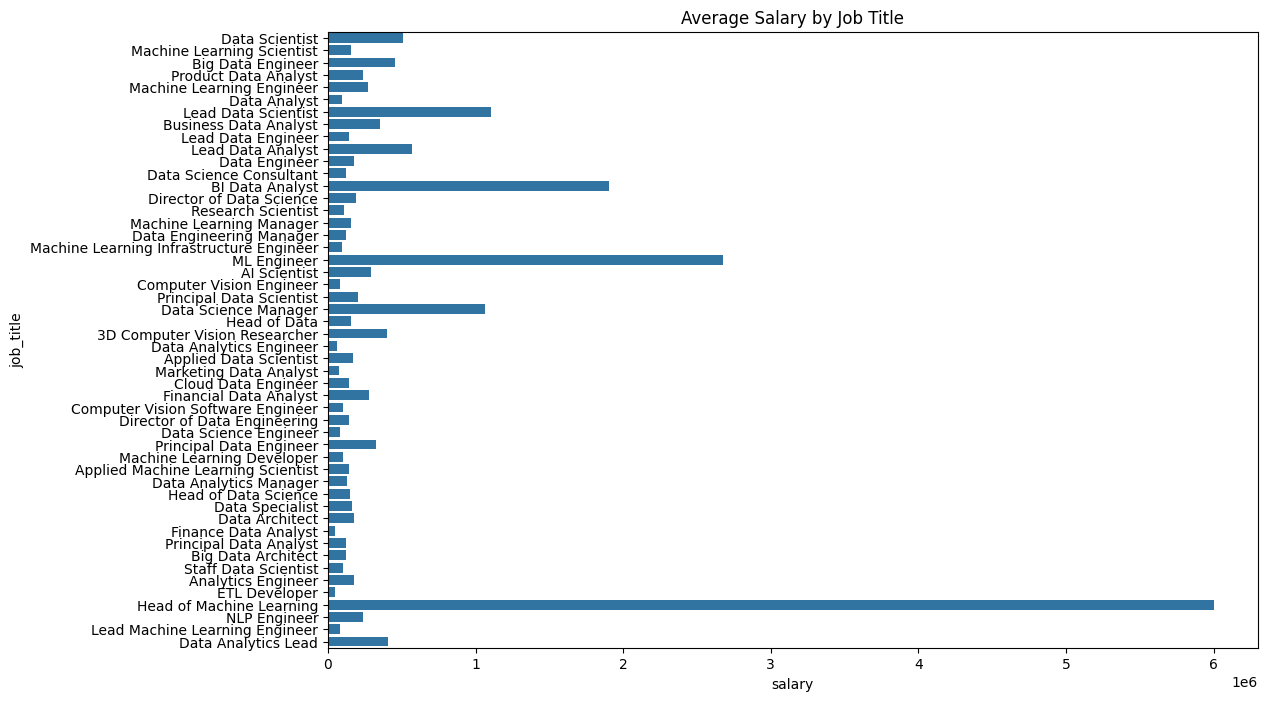

<ipython-input-4-d676820e476d>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='experience_level', y='salary', data=data, estimator=np.mean, ci=None)


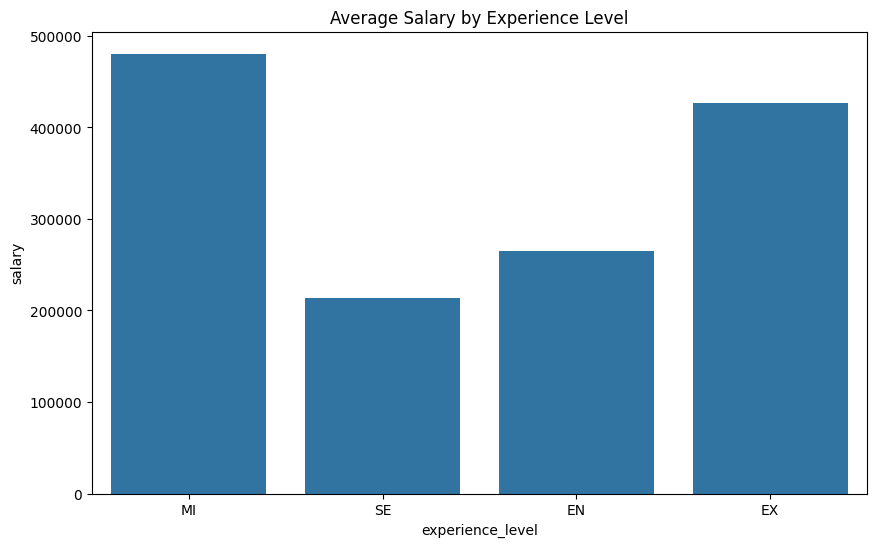

In [ ]:
# Distribution of salaries
plt.figure(figsize=(10, 6))
sns.histplot(data['salary'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.show()

# Average salary by job title
plt.figure(figsize=(12, 8))
sns.barplot(x='salary', y='job_title', data=data, estimator=np.mean, ci=None)
plt.title('Average Salary by Job Title')
plt.show()

# Average salary by experience level
plt.figure(figsize=(10, 6))
sns.barplot(x='experience_level', y='salary', data=data, estimator=np.mean, ci=None)
plt.title('Average Salary by Experience Level')
plt.show()



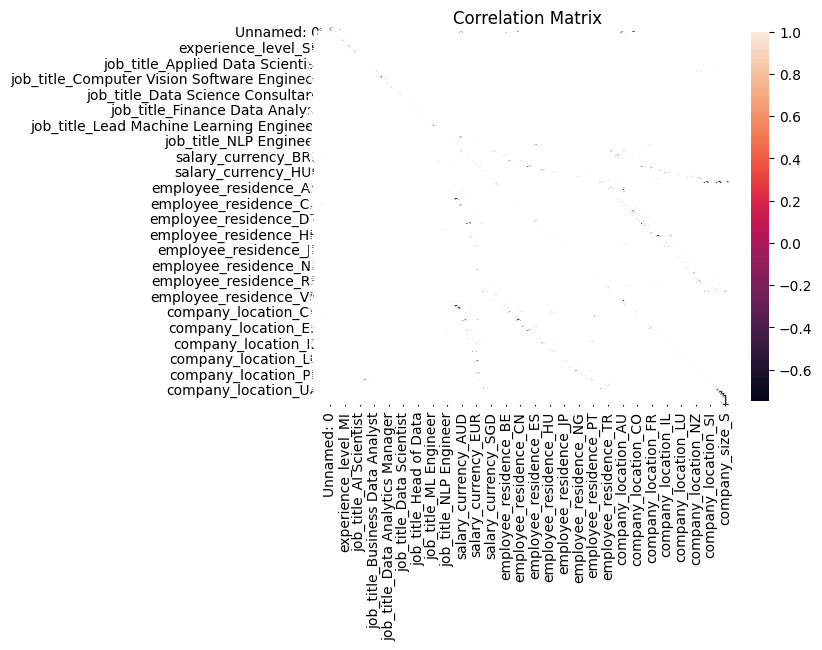

In [ ]:
# Convert categorical columns to numerical using one-hot encoding
data_encoded = pd.get_dummies(data)

# Calculate the correlation matrix on the encoded data
correlation_matrix = data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Handle missing values if any
data = data.dropna()

# Convert categorical columns to numerical (one-hot encoding)
data = pd.get_dummies(data, columns=['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size'], drop_first=True)

# Feature and target variable
X = data.drop(columns=['salary'])
y = data['salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 7730499601808.803
R^2 Score: 0.043632601388568615


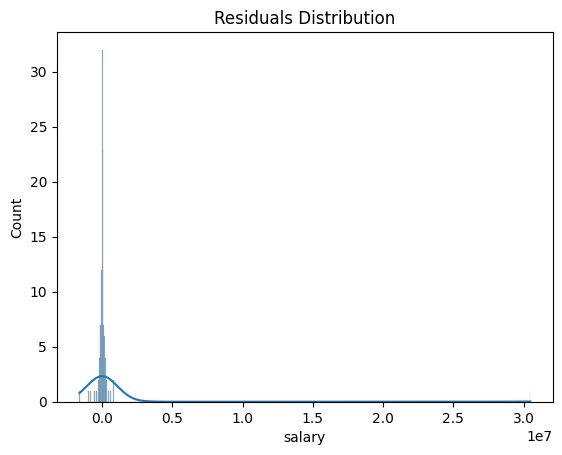

Random Forest Mean Squared Error: 7627624652700.974
Random Forest R^2 Score: 0.05635962454726806


In [ ]:
# Check residuals
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

# Consider different models and hyperparameter tuning for improvement
# Example: Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print(f'Random Forest Mean Squared Error: {rf_mse}')
print(f'Random Forest R^2 Score: {rf_r2}')

In [ ]:
# Save the model
joblib.dump(model, 'employee_salary_model.pkl')

# Load the model
loaded_model = joblib.load('employee_salary_model.pkl')

# Get missing columns from training data
missing_cols = set(X_train.columns) - set(new_data.columns)

# Add missing columns to new data and fill with 0
for col in missing_cols:
    new_data[col] = 0

# Reorder columns to match training data
new_data = new_data[X_train.columns]

# Predict with new data
new_predictions = loaded_model.predict(new_data)
print(new_predictions)

[-124117.03286835]


<ipython-input-12-50ebea63776d>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data[col] = 0
<ipython-input-12-50ebea63776d>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data[col] = 0
<ipython-input-12-50ebea63776d>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data[col] = 0
<